## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [115]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [116]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [117]:
from sklearn import preprocessing
# normalize the data attributes
# normalized_X_train = preprocessing.normalize(x_train)
# normalized_X_test = preprocessing.normalize(x_test)

In [118]:
import numpy as np
# y_train = np.reshape(y_train, (-1,1))
# normalized_y_train =preprocessing.normalize(y_train)



In [119]:
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))
# normalized_y_test =preprocessing.normalize(y_test)

### let's normalize y using the max price 

In [120]:
max_y = y_train.max()
max_y_test = y_test.max()
max_y_test

y_train = y_train/max_y
y_test = y_test/max_y

In [121]:

normalized_X_test = preprocessing.normalize(x_test)
normalized_X_test = preprocessing.normalize(x_test)

In [122]:
normalized_X_train.shape, y_train.shape, normalized_X_test.shape, y_test.shape

((404, 13), (404, 1), (102, 13), (102, 1))

## Define Model

In [61]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility 
numpy.random.seed(42)

In [164]:
# https://keras.io/getting-started/sequential-model-guide
model = Sequential()
model.add(Dense(13, input_dim=13, activation ='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='rmsprop',loss='mse', metrics=['mean_squared_error'])
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.compile(loss='mean_squared_error',
#               optimizer='sgd',
#               metrics=['mae', 'acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_64 (Dense)             (None, 3)                 42        
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 4         
Total params: 228
Trainable params: 228
Non-trainable params: 0
_________________________________________________________________


In [165]:
 hisotry = model.fit(normalized_X_train, y_train, epochs=50)

Epoch 1/50
404/404 [==============================] - 1s 2ms/step - loss: 0.2345 - mean_squared_error: 0.2345
Epoch 2/50
404/404 [==============================] - 0s 36us/step - loss: 0.2345 - mean_squared_error: 0.2345
Epoch 3/50
404/404 [==============================] - 0s 40us/step - loss: 0.2345 - mean_squared_error: 0.2345
Epoch 4/50
404/404 [==============================] - 0s 46us/step - loss: 0.2345 - mean_squared_error: 0.2345
Epoch 5/50
404/404 [==============================] - 0s 44us/step - loss: 0.2345 - mean_squared_error: 0.2345
Epoch 6/50
404/404 [==============================] - 0s 43us/step - loss: 0.2345 - mean_squared_error: 0.2345
Epoch 7/50
404/404 [==============================] - 0s 44us/step - loss: 0.2345 - mean_squared_error: 0.2345
Epoch 8/50
404/404 [==============================] - 0s 43us/step - loss: 0.2345 - mean_squared_error: 0.2345
Epoch 9/50
404/404 [==============================] - 0s 43us/step - loss: 0.2345 - mean_squared_error: 0.2345
Ep

In [166]:
#Evaluate the model
# scores = model.evaluate(normalized_X_test, y_test)
test_mse_score, test_mae_score = model.evaluate(normalized_X_test, y_test)
print(f"{model.metrics_names[1]}: {scores[1]*1000}")
test_mse_score

102/102 [==============================] - 0s 3ms/step
mean_squared_error: 22649.067710427677


0.24634314927400328

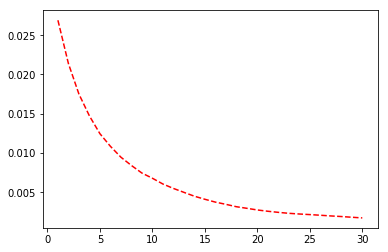

In [167]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.show();

In [170]:
hisotry.history

{'loss': [0.23446419790829762,
  0.23446419628539888,
  0.2344641982033701,
  0.23446419510510888,
  0.23446419835090637,
  0.23446419687554387,
  0.23446420130163137,
  0.23446419805583388,
  0.23446419466250012,
  0.23446420071148635,
  0.23446420277699387,
  0.23446419318713765,
  0.2344641959903264,
  0.23446419894105136,
  0.23446419776076138,
  0.23446420218684885,
  0.23446419894105136,
  0.23446419717061637,
  0.23446419672800764,
  0.23446419746568886,
  0.23446419864597887,
  0.23446419569525387,
  0.2344641959903264,
  0.23446419938366012,
  0.23446419407235514,
  0.23446419805583388,
  0.2344642017442401,
  0.23446420130163137,
  0.23446419776076138,
  0.23446419776076138,
  0.23446419658047138,
  0.23446419894105136,
  0.23446419805583388,
  0.23446419687554387,
  0.23446419658047138,
  0.23446420543264634,
  0.23446420277699387,
  0.23446419923612388,
  0.23446419481003639,
  0.23446419554771764,
  0.23446419805583388,
  0.23446419318713765,
  0.23446419864597887,
  0.234

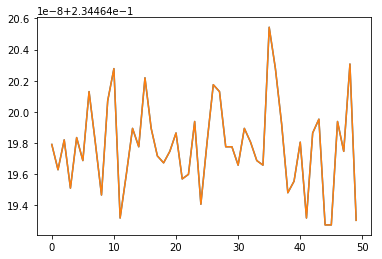

In [175]:
import matplotlib.pyplot as plt
plt.plot(hisotry.history['mean_squared_error'])
plt.plot(hisotry.history['loss'])
# pyplot.plot(history.history['mean_absolute_percentage_error'])
# pyplot.plot(history.history['cosine_proximity'])
plt.show()

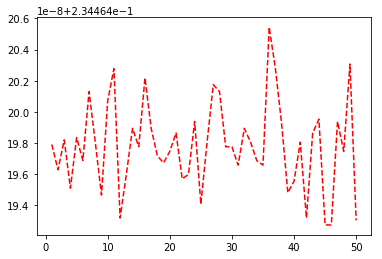

In [176]:
training_accuracy = hisotry.history['mean_squared_error']
epoch_count = range(1, len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, 'r--')
plt.show();

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [113]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.